### 1. Importing modules

In [1]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sympy import *
from pysr import PySRRegressor
from gplearn.genetic import SymbolicRegressor


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


### 2.Loading dataframe

In [2]:
df = pd.read_csv('data.csv',sep=',')
df.head()

,u,g,r,i,z,u_err,g_err,r_err,i_err,z_err,specz,specz_err,photoz,photoz_err
0,20.05931,17.90802,16.87680,16.41877,16.03087,0.088861,0.008064,0.005648,0.005547,0.013291,0.132936,0.000029,0.116048,0.012696
1,20.05931,17.90802,16.87680,16.41877,16.03087,0.088861,0.008064,0.005648,0.005547,0.013291,0.132956,0.000026,0.116048,0.012696
2,18.84740,17.34797,16.55364,16.14608,15.82637,0.067545,0.005925,0.004896,0.005033,0.013492,0.125875,0.000027,0.098719,0.020465
3,19.40448,18.01141,17.18348,16.71742,16.41500,0.053903,0.008701,0.006848,0.006764,0.018429,0.080967,0.000011,0.126209,0.025524
4,20.30011,18.28357,17.29899,16.86755,16.51351,0.080408,0.008575,0.006134,0.006083,0.014749,0.125531,0.000026,0.112964,0.010141


In [3]:
df = df
df = df[df['u'] > 0]
df = df[df['g'] > 0]
df = df[df['r'] > 0]
df = df[df['i'] > 0]
df = df[df['z'] > 0]
error_cut = 0.3  
df = df[df['u_err'] < error_cut]
df = df[df['g_err'] < error_cut]
df = df[df['r_err'] < error_cut]
df = df[df['i_err'] < error_cut]
df = df[df['z_err'] < error_cut]
df = df[df['specz_err'] < 0.01]
df = df[(df['specz'] > 0) & (df['specz'] < 1.)]

In [4]:
df.describe()

,u,g,r,i,z,u_err,g_err,r_err,i_err,z_err,specz,specz_err,photoz,photoz_err
count,809281.000000,809281.000000,809281.000000,809281.000000,809281.000000,809281.000000,809281.000000,809281.000000,809281.000000,809281.000000,8.092810e+05,809281.000000,809201.000000,809201.000000
mean,19.711728,18.180565,17.318634,16.898437,16.610383,0.092711,0.014399,0.009755,0.009340,0.023705,1.489404e-01,-0.000085,-11.206295,-11.333416
std,1.180486,1.238148,1.176157,1.134163,1.139215,0.071077,0.021454,0.013422,0.011407,0.029410,1.328144e-01,0.014536,336.779900,336.775591
min,12.334680,10.570360,11.014940,10.584090,10.336530,0.002827,0.001499,0.001460,0.000789,0.000474,3.746492e-08,-6.000000,-9999.000000,-9999.000000
25%,19.000750,17.520230,16.722850,16.318600,16.014040,0.042325,0.006544,0.005025,0.005020,0.011067,7.576388e-02,0.000012,0.079807,0.011601
50%,19.700840,18.123850,17.300620,16.889230,16.591030,0.068286,0.008925,0.006541,0.006530,0.015502,1.154856e-01,0.000021,0.114195,0.017222
75%,20.433260,18.645760,17.674230,17.269750,17.006490,0.117212,0.012518,0.008482,0.008631,0.022776,1.694996e-01,0.000032,0.168528,0.023817
max,32.556140,23.711720,22.923620,31.117750,27.848230,0.299998,0.299957,0.282357,0.291946,0.299918,9.999526e-01,0.009326,0.999571,0.277625


### 3.Creating train and test data

In [5]:
filename = 'data.csv'

df_train, df_test = train_test_split(df, train_size = 0.8, random_state=123)
#df_test = df_test[df_test['specz'] > 1.]
df_train.to_csv(filename[:-4]+'_train.csv', sep=' ', header=None, index=False)
df_test.to_csv(filename[:-4]+'_test.csv', sep=' ', header=None, index=False)

In [6]:
df_train.head()

,u,g,r,i,z,u_err,g_err,r_err,i_err,z_err,specz,specz_err,photoz,photoz_err
225621,20.70552,18.88517,17.67181,17.21974,16.87947,0.124928,0.012979,0.007144,0.006431,0.014508,0.195101,0.000031,0.188042,0.010568
233957,17.80799,16.08707,15.30307,14.95896,14.65137,0.018329,0.003191,0.002664,0.002670,0.004870,0.032818,0.000011,0.042720,0.012195
792307,19.92266,19.09681,18.82154,18.72380,18.59270,0.044487,0.011463,0.011225,0.013843,0.039312,0.024702,0.000006,0.060760,0.036649
153804,19.88092,18.08543,17.20749,16.81715,16.49590,0.070685,0.008134,0.006142,0.006062,0.012774,0.070807,0.000022,0.093245,0.012525
259840,19.02518,17.69330,16.95810,16.56490,16.34922,0.066261,0.009080,0.006872,0.007009,0.020276,0.140475,0.000009,0.135293,0.022122


In [7]:
print(df_train.shape)
print(df_test.shape)

(647424, 14)
(161857, 14)


In [8]:
df_train['specz']

225621    0.195101
233957    0.032818
792307    0.024702
153804    0.070807
259840    0.140475
            ...   
192854    0.132536
17761     0.086031
28067     0.090844
278875    0.132759
777108    0.416502
Name: specz, Length: 647424, dtype: float64

* Taking 5000 points from train and test for symbolic regression experiment

In [9]:

X_train = df_train.iloc[:,:5].to_numpy() #u,g,r,i,z
y_train = df_train.iloc[:,10].to_numpy()  #specz

X_test = df_test.iloc[:,:5].to_numpy()   #u,g,r,i,z
y_test = df_test.iloc[:,10].to_numpy()    #specz
# X_err = df_test.iloc[:,5:10].to_numpy()

In [10]:
X_train.shape

(647424, 5)

### 4. PySR SR model

This will take approx 263.0 minutes to run for training

In [11]:
model = PySRRegressor(
    populations = 100,
    population_size = 50,
    niterations = 5,
    #batching = config['batching'],
    #batch_size = config['batch_size'],
    binary_operators = ['plus', 'mult'],
    unary_operators = ['sub'],
    extra_sympy_mappings = {'pow2': lambda x : x**2, 'pow3' : lambda x : x**3, 'pow4' : lambda x : x**4, 'pow5' : lambda x : x**5},
    variable_names = ['u','g','r','i','z'],
    model_selection = 'accuracy',
    #weights = weights,
    loss = 'L2DistLoss()',
#     equation_file = os.path.join(config['outdir'], config['equation_file']) ,
    progress = True
)

c:\Users\Sarvesh Purohit\anaconda3\lib\site-packages\pysr\sr.py:883: FutureWarning: variable_names is a data dependant parameter so should be passed when fit is called. Ignoring parameter; please pass variable_names during the call to fit instead.
  warnings.warn(


In [13]:
starttime = time.time()

model.fit(X_train, y_train)

endtime = time.time()

print(f'Time take to fit model - {(endtime-starttime)//60} minutes') 

c:\Users\Sarvesh Purohit\anaconda3\lib\site-packages\pysr\sr.py:1762: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
c:\Users\Sarvesh Purohit\anaconda3\lib\site-packages\pysr\sr.py:1289: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
c:\Users\Sarvesh Purohit\anaconda3\lib\site-packages\pysr\sr.py:1785: UserWarning: Note: you are running with more than 10,000 datapoints. You should consider turning on batching (https://astroautomata.com/PySR/options/#batching). You should also reconsider if you need that many datapoints. Unless you have a large amount of noise (in which case you should smooth your dataset first), generally < 10,000 datapoints is enough to find a functional form with symbolic regression. More datapoints will lower the search speed.
  warnings.warn(


In [14]:
print(model)

PySRRegressor.equations_ = [
	   pick         score                                           equation  \
	0        0.000000e+00                                          0.1489886   
	1        6.269626e-02                                 (0.008550951 * x1)   
	2        4.351818e-01                   ((0.08519883 * x1) + -1.3999614)   
	3        9.057384e-02         (x2 * (-0.07410639 + (0.0045276736 * x1)))   
	4        1.419044e-01  ((x1 * (-0.55013555 + (0.017130435 * x1))) + 4...   
	5        6.096613e-08  ((x1 * (-0.56478 + ((0.01712588 * x1) + 0.0148...   
	6  >>>>  6.150999e-03  ((x1 * (-0.5488932 + ((0.01799402 * x1) + (-0....   
	
	       loss  complexity  
	0  0.017670           1  
	1  0.015587           3  
	2  0.006528           5  
	3  0.005446           7  
	4  0.004101           9  
	5  0.004101          11  
	6  0.004051          13  
]


In [19]:
model.equations.to_csv('eq.csv', index=False)

c:\Users\Sarvesh Purohit\anaconda3\lib\site-packages\pysr\sr.py:1128: FutureWarning: PySRRegressor.equations is now deprecated. Please use PySRRegressor.equations_ instead.
  warnings.warn(


In [20]:
n_equations = model.equations.shape[0]

print(f'Best equation : {model.sympy()}\n')

Best equation : x1*(0.01799402*x1 - 0.0010030421*x3 - 0.5488932) + 4.46244



In [23]:
for k in range(n_equations):

    equation_sympy =  model.equations['sympy_format'][k]
    print(f'==========================================\n')
    print(f'Equation {str(k)} : {equation_sympy}')
    print(f'==========================================\n')
    

    y = y_test
    y_predict = model.equations['lambda_format'][k](X_test)

    def heatmap_predictions() :
        
        H,xedges, yedges = np.histogram2d(y,y_predict, bins=50)
        level = np.linspace(0,np.round(2*np.max(np.log(np.transpose(H+1))))/2.0,20)
        xe = np.zeros(len(xedges)-1)
        ye = np.zeros(len(yedges)-1)
        for i in range(len(xedges)-1):
            xe[i] = 0.5*(xedges[i+1]+xedges[i])
            ye[i] = 0.5*(yedges[i+1]+yedges[i])
        fig, ax = plt.subplots()
        ax.set_facecolor(color='black')
        plt.contourf(xe,ye,np.log(np.transpose(H+1)),levels=level,cmap='hot')
        plt.plot([min(y),max(y)],[min(y),max(y)],'-',color='grey',alpha=0.9, linewidth=1.5)
        plt.xlabel(r'$z_{spec}$')
        plt.ylabel(r'$z_{phot}$')
        plt.ylim(min(y), max(y))
        plt.xlim(min(y), max(y))
        plt.title('Logarithmic density of true vs predicted redshifts of ~3000 galaxies in test set')

        cbar = plt.colorbar()
        cbar.set_label('$log(density)$',fontsize=20)
        cbar.ax.tick_params(labelsize=20)
        cbar.solids.set_edgecolor("face")

        plt.savefig('density_plot.png'))
        #plt.show()
        plt.close()

    heatmap_predictions()

    print('Metric a')
    outliers=y_predict[abs(y-y_predict)>0.1]
    print(f'Catastrophic Outliers: {outliers.shape[0]*100.0/y.shape[0]} %')
    
    print(f'Total rms: {np.sqrt(np.mean((y-y_predict)**2))}')
    
    print(f'rms w/o outliers {np.sqrt(np.mean(((y-y_predict)[abs(y-y_predict)<0.1])**2))}')
    
    print(f'Bias: {np.mean(y-y_predict)}')
    
       
    def plot_z_photo_vs_z_spec ():

        # plot of predictions vs truth
        plt.figure() 
        plt.plot(y, y_predict, '.')
        plt.plot([min(y),max(y)],[min(y),max(y)],'-',color='grey',alpha=0.9, linewidth=1.5)
        plt.xlabel(r'$z_{spec}$')
        #plt.tick_params(axis='both', which='major', labelsize=20)
        plt.ylabel(r'$z_{phot}$')
        plt.ylim((min(y),max(y)))
        plt.xlim((min(y),max(y)))
        plt.title('Photometric redshift prediction for test set')
        plt.savefig('predictions.png')
        #plt.show()
        plt.close()

    plot_z_photo_vs_z_spec()

    def calculate_errors(expr) :
        # source : https://github.com/HDembinski/essays/blob/master/error_propagation_with_sympy.ipynb

        expr = sympy.parse_expr(expr)

        symbols = sympy.symbols('u g r i z')
        err_symbols = sympy.symbols('err_u err_g err_r err_i err_z')

        expr2 = sum(expr.diff(s) ** 2 * c**2 for s, c in zip(symbols, err_symbols))
        expr2 = expr2.simplify() # recommended for speed and accuracy

        #fval = sympy.lambdify(symbols, expr)
        fcov = sympy.lambdify(symbols + err_symbols, expr2, 'numpy')

        def fn(variables, errs):
            return np.sqrt(fcov(*variables, *errs)) #fval(*x), fcov(*x, *c)

        return fn

    err = calculate_errors(model.equations['equation'][k])(np.transpose(X_test), np.transpose(X_err))

    def plot_predictions_with_errors() :

        # plot of predictions with error for 300 subsamples of galaxies
        rng = np.random.default_rng(12345)
        def stratified_sample() :
            interval_size = 0.1
            sample_size = int(300 / (max(y) / interval_size))
            l = np.arange(0, max(y), 0.1)
            idx = np.empty(0, dtype='int') 
            for i in l :
                cur_idx = ((y >= i) & (y < i+interval_size)).nonzero()[0]
                if len(cur_idx) > sample_size :
                    cur_idx = rng.choice(cur_idx, sample_size)

                idx = np.concatenate([idx, cur_idx])
            return idx

        #idx = rng.choice(range(len(y)), 300)
        idx = stratified_sample()

        plt.figure() 
        plt.errorbar(y[idx], y_predict[idx], yerr=err[idx], fmt='.', linewidth=1, color='blue', capsize=5)
        plt.plot([min(y),max(y)],[min(y),max(y)],'-',color='r')
        plt.xlabel(r'$z_{spec}$')
        #plt.tick_params(axis='both', which='major', labelsize=20)
        plt.ylabel(r'$z_{phot}$')
        plt.ylim(min(y[idx])-0.05, max(y[idx])+0.05)
        plt.xlim(min(y[idx]), max(y[idx]))
        plt.title('Photometric redshift prediction and errorbars for subsample of 300 galaxies')
        plt.savefig('predictions_with_error.png')
        #plt.show()
        #plt.draw()
        #plt.pause(0.001)
        plt.close()
    
    if len(err.shape) > 0:
        plot_predictions_with_errors()

    print(f'==========================================\n')

SyntaxError: unmatched ')' (1486760102.py, line 36)

### 5.prediction on test dataset

In [15]:
Y_pred=model.predict(X_test)

In [16]:
mean_squared_error(y_test, Y_pred, squared=False)

0.06344907514400835

In [17]:
model.equations.to_csv('eq', index=False)

c:\Users\Sarvesh Purohit\anaconda3\lib\site-packages\pysr\sr.py:1128: FutureWarning: PySRRegressor.equations is now deprecated. Please use PySRRegressor.equations_ instead.
  warnings.warn(


In [18]:
print(f'Best equation : {model.sympy()}\n')

Best equation : x1*(0.01799402*x1 - 0.0010030421*x3 - 0.5488932) + 4.46244



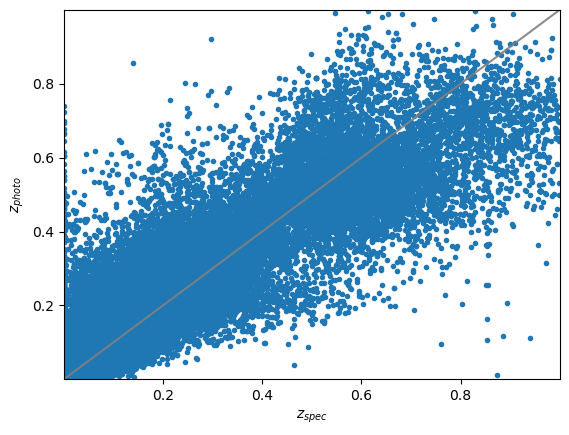

In [28]:
plt.figure() 
plt.plot(y_test, Y_pred, '.')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'-',color='grey',alpha=0.9, linewidth=1.5)
plt.ylabel(r'$z_{photo}$')
plt.xlabel(r'$z_{spec}$')
plt.ylim((min(y_test),max(y_test)))
plt.xlim((min(y_test),max(y_test)))
plt.savefig('z_spec vs z_photo')
plt.show()

In [ ]:
def calculate_errors(expr) :
        # source : https://github.com/HDembinski/essays/blob/master/error_propagation_with_sympy.ipynb

        expr = sympy.parse_expr(expr)

        symbols = sympy.symbols('u g r i z')
        err_symbols = sympy.symbols('err_u err_g err_r err_i err_z')

        expr2 = sum(expr.diff(s) ** 2 * c**2 for s, c in zip(symbols, err_symbols))
        expr2 = expr2.simplify() # recommended for speed and accuracy

        #fval = sympy.lambdify(symbols, expr)
        fcov = sympy.lambdify(symbols + err_symbols, expr2, 'numpy')

        def fn(variables, errs):
            return np.sqrt(fcov(*variables, *errs)) #fval(*x), fcov(*x, *c)

        return fn

### 6. Using GpLearn

In [40]:
# function_set = ['add', 'sub', 'mul']

# est_gp = SymbolicRegressor(population_size=5000, function_set=function_set,#the number of programs in each generation
#                            generations=30, stopping_criteria=0.07, #The required metric value required in order to stop evolution early.
#                            p_crossover=0.7, p_subtree_mutation=0.1,
#                            p_hoist_mutation=0.05, #0.05, The probability of performing hoist mutation on a tournament winner. Hoist mutation takes the winner of a tournament and selects a random subtree from it. A random subtree of that subtree is then selected and this is ‘hoisted’ into the original subtrees location to form an offspring in the next generation. This method helps to control bloat.
#                            p_point_mutation=0.1,
#                            max_samples=0.9, verbose=1,
#                            parsimony_coefficient=0.01, random_state=0,feature_names=df_train.columns[:5])

In [41]:
# starttime = time.time()

# est_gp.fit(X_train, y_train)

# endtime = time.time()

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    28.58      2.50467e+22        7        0.0853992         0.089598      5.56m
   1     7.57      2.96723e+22        5        0.0663772        0.0684074      3.16m
